In [3]:
import pandas as pd   #its for reading the dataset
import numpy as np    #its for manipulating data
import matplotlib.pyplot as plt #visualization
import seaborn as sns ; sns.set() #visualization

# Reading the dataset

In [4]:
#Loading dataset
spotify_data = pd.read_csv("data.csv")

# Check the head of the dataset
print(spotify_data.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      0  
1      1  
2      0  
3      1  
4      1  


In [5]:
print(spotify_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB
None


# Visualization

<Axes: xlabel='key', ylabel='count'>

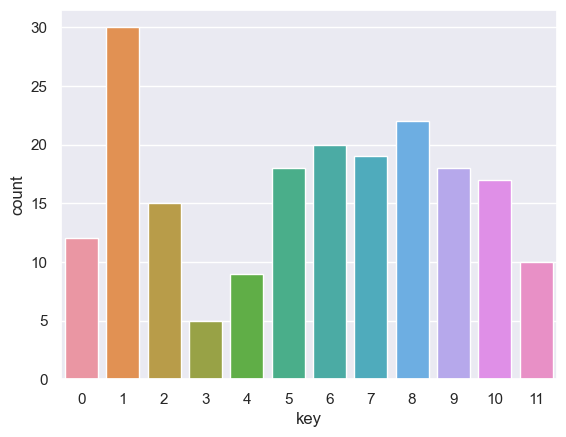

In [8]:
#bar plots
sns.countplot(data=spotify_data, x='key')



<Axes: xlabel='energy', ylabel='speechiness'>

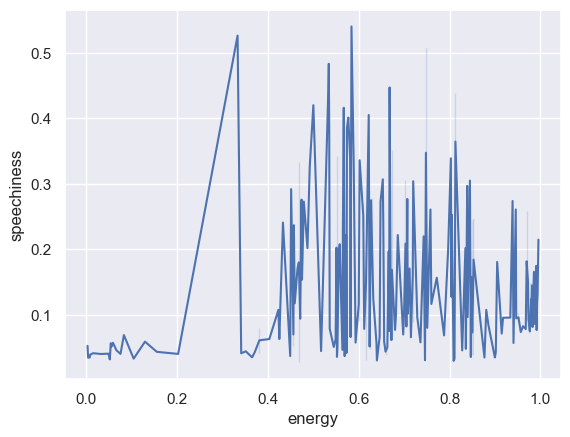

In [9]:
#lineplot relationship between speechiness and energy

sns.lineplot(data=spotify_data, x='energy', y='speechiness')

<Axes: xlabel='danceability', ylabel='energy'>

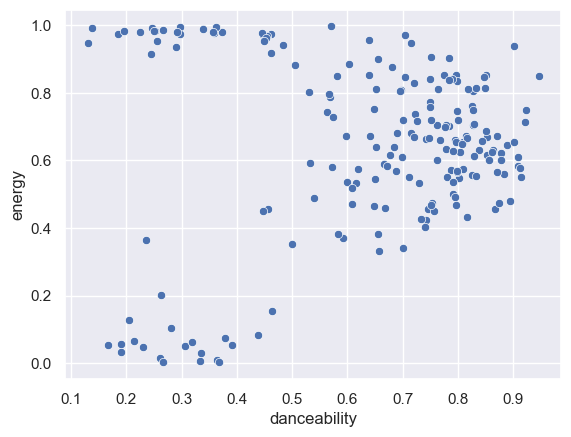

In [10]:
#scatterplot
#relationship between the danceability and energy of a song

sns.scatterplot(data=spotify_data, x='danceability', y='energy')

<Axes: xlabel='mode', ylabel='acousticness'>

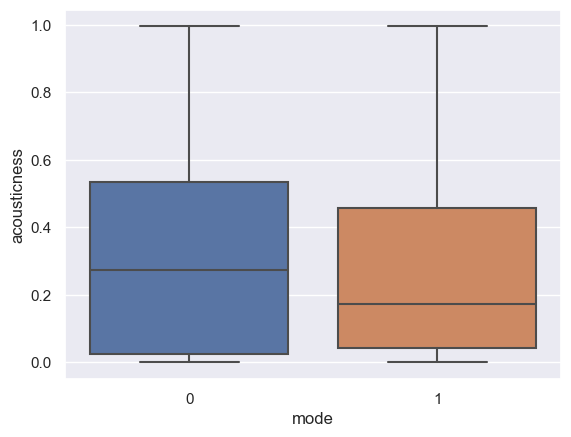

In [11]:
#boxplot of acousticness for each mode
sns.boxplot(data=spotify_data, x='mode', y='acousticness')

<Axes: xlabel='duration_ms', ylabel='Count'>

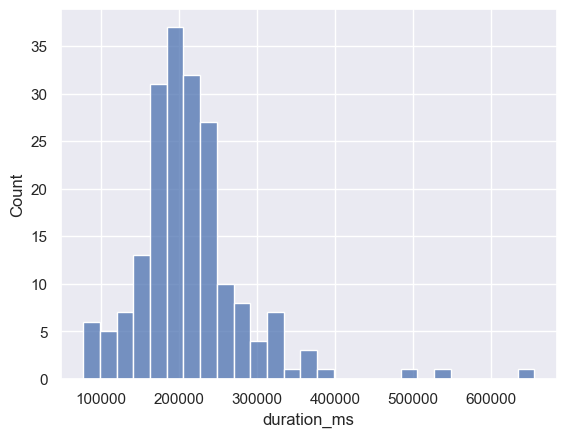

In [12]:
#histogram for duration_ms
sns.histplot(data=spotify_data, x='duration_ms')

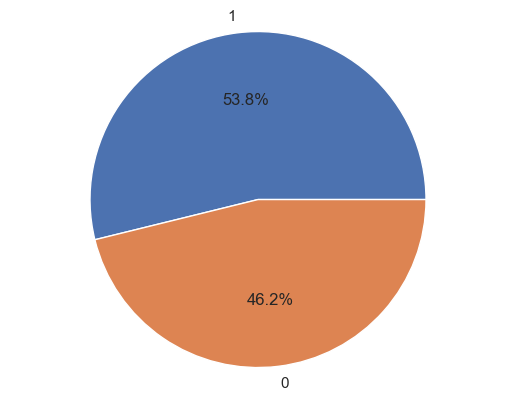

In [13]:
#pie chart for mode feature it gives us to percentage disturibition

time_sig_counts = spotify_data['mode'].value_counts()
plt.pie(time_sig_counts, labels=time_sig_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

 # Preprocessing

In [14]:
spotify_data.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
X = spotify_data[['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = spotify_data['liked']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Fit the logistic regression model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8205128205128205


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {acc:.4f}')

Decision Tree Accuracy: 0.8974


In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = gb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {acc:.4f}')

Gradient Boosting Accuracy: 0.8718


In [22]:
from sklearn.svm import SVC

# Train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {acc:.4f}')

SVM Accuracy: 0.8462


In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the model
y_pred = knn_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {acc:.4f}')

KNN Accuracy: 0.8205


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {acc:.4f}')

Random Forest Accuracy: 0.8974
